# Quantitative Analysis of the Magnificent Seven
___

<a id="cont"></a>
_______________________________________________________________________________________________________________________________

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing packages</a>

<a href=#three>3. Loading the data</a>

<a href=#four>4.  Descriptive Statistics</a>

<a href=#five>5. Time Series Analysis</a>

<a href=#six>6.  Volatility Analysis</a>


<a href=#eight>7.  Correlation Analysis</a>


<a href=#eight>8.  Comparative Analysis</a>


<a href=#eight>9.  Daily Risk Vs. Return Analysis</a>



<a href=#eight>10.  Conclusion</a>
___

<a id="one"></a>
# 1) Introduction
<a href=#cont>Back to Table of Contents</a>

___

In the stock market, quantitative analysis is a financial approach that makes use of statistical and mathematical methods to examine equities and financial markets. In this project, we will do a quantitative analysis of the so-called "magnificent seven." The name "Magnificent Seven" was derived from the title of a 1960 Western film directed by John Sturges, which starred a group of seven gunmen. But now, when we are talking about the magnificent seven, we mean the group of high-performing and influential companies in the U.S. stock market. The term was first used in 2023 by Bank of America analyst Michael Hartnett in reference to the following seven companies: **Alphabet (GOOG)**,**Amazon (AMZN)**,**Apple (AAPL)**,**Meta Platforms (META)**,**Microsoft (MSFT)**,**NVIDIA (NVDA)**, and **Tesla (TSLA)**. These companies are well-known for their market dominance, technological influence, and changes in consumer behavior and economic trends. So, why do a quantitative analysis of these stocks? A short answer is that these businesses have the potential to grow significantly and are the leaders of industries including digital services, cloud computing, electric cars, and artificial intelligence. But we must also bear in mind that these factors have already been priced in, so investing in them still carries risks

Below is the process we can follow for the task of Quantitative Analysis of the magnificent seven:

*   Clearly define the objectives and questions to be answered.
*   Identify the key performance indicators (KPIs) relevant to the analysis.
*   Gather historical stock market data, including prices, volumes, and other relevant financial indicators.
*   Clean and preprocess the data to handle missing values, outliers, and errors.
*   Conduct initial analysis to understand data distributions, patterns, and correlations.
*   Implement various strategies based on quantitative analysis.

 <a id="two"></a>
## 2. Importing Packages

Now, lets begin with the task of Quantitative Analysis of the stock market by importing the necessary packages and getting data from yahoo finance.

<a href=#cont>Back to Table of Contents</a>

In [1]:
!pip install kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import kaleido
pio.templates.default = 'plotly_white'
pio.renderers.default = "png"

In [3]:
# list of stock tickers
tickers = ['GOOG', 'AMZN', 'AAPL', 'META', 'MSFT', 'NVDA', 'TSLA']

# Initialize an empty dataframe to hold the consolidated data
stocks = pd.DataFrame()

# Fetch data for each ticker and append to the stocks dataframe
for ticker in tickers:
  stock_data = yf.download(ticker, start='2024-01-01', end='2024-06-14')
  stock_data['Ticker'] = ticker
  stocks = pd.concat([stocks, stock_data])

# Reset index to have 'Date' as a column rather than the index
stocks = stocks.reset_index()


# Save the stocks dataframe to a csv file
stocks.to_csv('stocks.csv', index=False)

print("Stocks data saved to stocks.csv")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Stocks data saved to stocks.csv


<a id="three"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>

In this section we will load the data from the `stocks csv` file into a DataFrame.  We will be using Pandas python package to read the csv file from our local computer.


<a href=#cont>Back to Table of Contents</a>

In [4]:
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2024-01-02,139.600006,140.615005,137.740005,139.559998,139.401367,20071900,GOOG
1,2024-01-03,138.600006,141.089996,138.429993,140.360001,140.200455,18974300,GOOG
2,2024-01-04,139.850006,140.634995,138.009995,138.039993,137.883087,18253300,GOOG
3,2024-01-05,138.352005,138.809998,136.850006,137.389999,137.233841,15433200,GOOG
4,2024-01-08,138.000000,140.639999,137.880005,140.529999,140.370270,17645300,GOOG


In [5]:
stocks.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
793,2024-06-07,176.130005,179.350006,175.580002,177.479996,177.479996,56244900,TSLA
794,2024-06-10,176.059998,178.570007,173.169998,173.789993,173.789993,50869700,TSLA
795,2024-06-11,173.919998,174.750000,167.410004,170.660004,170.660004,64761900,TSLA
796,2024-06-12,171.119995,180.550003,169.800003,177.289993,177.289993,90389400,TSLA
797,2024-06-13,188.389999,191.080002,181.229996,182.470001,182.470001,118984100,TSLA


Headers for the `stocks.csv` file are shown below:

|**Header**|**Description**|
|-|-|
|Date| The trading date|
|Open| The opening price of the stock for the day|
|High|	The highest price of the stock during the day|
|Low| The lowest price of the stock during the day|
|Close| The closing price of the stock for the day|
|Adj Close| The adjusted closing price, which accounts for all corporate actions such as dividends, stock split, etc|
|Volume| Number of shares traded during the day|
|Ticker|The stock ticker symbol|

To perform a quantitative analysis, we can explore various statistical concepts like descriptive statistics, time series analysis, correlation analysis, and more. Here are some potential analyses we can perform:

1.  **Descriptive Statistics**: Summary statistics (mean, median, standard deviation, etc.) for each stock.
2.  **Time Series Analysis**: Trends and patterns over time, especially for closing prices.
3.  **Volatility Analysis**: How much the stock price fluctuates over a period.
4.  **Correlation Analysis**: How stock prices of different companies are related to each other.
5.  **Comparative Analysis**: Comparing the performance of different stocks.
6.  **Risk-Return Trade-off Analysis**: Analyzing the balance between the potential risks and rewards of different stocks, aiding in portfolio management.


Let’s implement all these concepts of Quantitative Analysis of the stock market one by one.

<a id="four"></a>
## 4. Descriptive Statistics
<a class="anchor" id="1.1"></a>

For every stock that we have on the dataset, descriptive statistics will give an overview of the data. We'll examine metrics such as a the mean, median, standard deciation and more.

<a href=#cont>Back to Table of Contents</a>

In [6]:
# Descriptive statistics for each stock
descriptive_stats = stocks.groupby('Ticker')['Close'].describe()
print(descriptive_stats)

        count        mean        std         min         25%         50%  \
Ticker                                                                     
AAPL    114.0  181.793333  10.143394  165.000000  172.364998  182.709999   
AMZN    114.0  174.328070  11.436308  144.570007  169.957497  177.404999   
GOOG    114.0  155.330438  13.856328  132.559998  143.864998  152.099998   
META    114.0  462.993773  47.727155  344.470001  452.649994  476.595001   
MSFT    114.0  410.674649  14.861915  367.750000  403.817497  412.919998   
NVDA    114.0   83.481632  18.510738   47.569000   70.606249   86.201500   
TSLA    114.0  184.665263  20.512685  142.050003  173.752502  178.364998   

               75%         max  
Ticker                          
AAPL    189.187504  214.240005  
AMZN    182.950005  189.500000  
GOOG    169.620003  179.559998  
META    496.040001  527.340027  
MSFT    421.437500  441.579987  
NVDA     91.239002  129.610001  
TSLA    191.875000  248.419998  


Lets breakdown the statistics for each stock:

1. **Apple, inc.(AAPL)**

  *  **Count**:  144 ( The number of trading days included on the dataset for AAPL).
  *  **Mean**: 181.79 (The average closing price).
  *  **Standard Deviation (Std)**: 10.14 ( Measures the amount of variation or dispersion of closing prices).
  *  **Minimum (Min)**: 165 (The lowest closing price in the dataset).
  *  **25th Percentile (25%)**: 172.36 ( 25% of the closing prices are below this value).
  *  **Median(50%)**: 182.71 ( The middle value of closing prices).
  *  **75th Percentile (75%)**: 189.19 (75% of the closing prices are below this value).
  *  **Maximum (Max)**: 214.24 ( The highest closing price in the dataset).

2. **Amazon.com, inc.(AMZN)**

  Similar statistics as APPL, but for AMZN. The mean closing price is 179.33, with a standard deviation of 11.43, indicating more variability in closing prices compared to AAPL.

3. **Alphabet inc. (GOOG)**
  The mean closing price is 155.33, with a standard deviation of 13.86. This indicates more variability in closing prices of GOOG compared to both AAPL and AMZN.

4. **Meta Platforms (META)**
  META shows the highest mean closing price (462.99) amongst the magnificent seven,and a highest standard deviation of 47.73, indicating the most significant price flactuation.

5. **Microsoft Corporation (MSFT)**
  MSFT shows the highest mean closing price of 410.67 and a standard deviation of 14.16, suggesting higher price variability than AAPL, AMZN and GOOG.

6. **Nvidia Corporation (NVDA)**
  Nvidia shows the lowest closing price of 83.48, when compared to the other stocks. It has a standard deviation of 18.51, which suggests that it has higher price variability than AAPL, AMZN, GOOG and MSFT.

7. **Tesla, Inc. (TSLA)**
  Tesla has a mean closing price of 184.67, with a standard deviation of 20.51, showing high variability when compared to the other stocks except for META.

<a id="four"></a>
## 5. Time Series Analysis
<a class="anchor" id="1.1"></a>

We'll then carry out the Time Series Analysis, concentrating on the closing prices, to look at trends and patterns over time:

<a href=#cont>Back to Table of Contents</a>

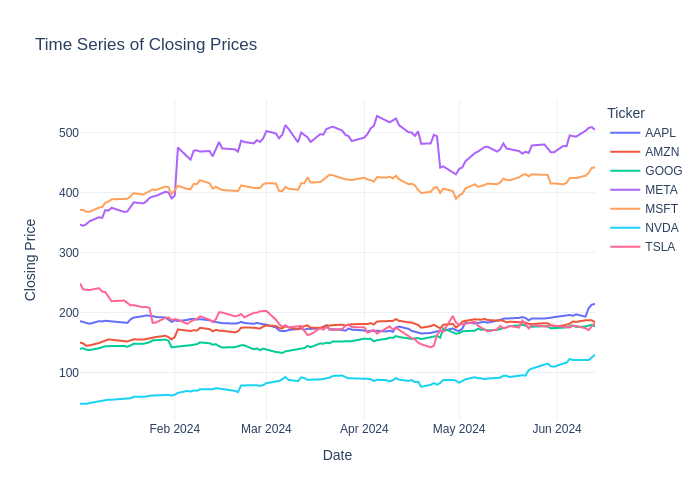

In [7]:
# Time series analysis
stocks['Date'] = pd.to_datetime(stocks['Date'])
pivot_data = stocks.pivot(index='Date', columns='Ticker', values='Close')


# Create a subplot
fig = make_subplots(rows=1, cols=1)

# Add traces for each stock ticker
for column in pivot_data.columns:
  fig.add_traces(
      go.Scatter(x=pivot_data.index, y=pivot_data[column], name=column),
      rows=1, cols=1
  )


# update layout
fig.update_layout(
    title_text = 'Time Series of Closing Prices',
    xaxis_title = 'Date',
    yaxis_title = 'Closing Price',
    legend_title = 'Ticker',
    showlegend = True
)

# Show the plot
fig.show()

The above plot displays the time series of the closing prices for each of the magnificent seven stocks over the observed period. Here are some key observations:

1. **Trend**: Each stock shows its unique trend over time. Most of the stocks show an upward trend over time, except for Tesla which shows a decreasing trend over time. They say that it is dropping because of concerns about the demand of electric vehicles.
2. **Volatility**: There is noticable volitility in the stock prices. For example, META shows more pronounced flactuations compared to others. We also saw this in the above section, where it had the highest standard deviation comapred to others.
3. **Comparative Performance**: In this dataset, it can be observed that MSFT and META tend to trade at higher price points than the other stocks.

<a id="four"></a>
## 6. Volatility Analysis
<a class="anchor" id="1.1"></a>

Let us now turn our attention to volatility analysis. We will determine and compare the closing price volatility (standard deviation) for every stock. It will reveal to us how much the stock values changed throughout that time:

<a href=#cont>Back to Table of Contents</a>

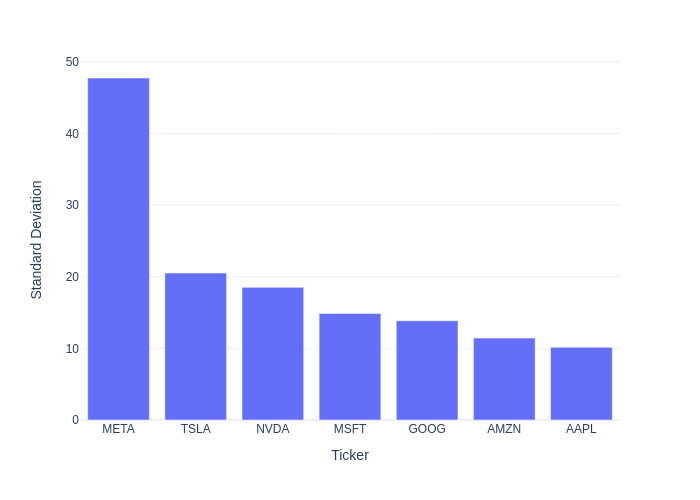

In [8]:
# Volatility Analysis
volatility = pivot_data.std().sort_values(ascending=False)

fig = px.bar(
    x=volatility.index,
    y=volatility.values,
    labels={'x': 'Ticker', 'y': 'Standard Deviation'},
)

# Show the figure
fig.show()

The bar chart shows the volatility (Standard Deviation) of the closing prices for each stock. We can also see that META was more prone to price flactuations during this period comapred to the other stocks.

<a id="four"></a>
## 7. Correlation Analysis
<a class="anchor" id="1.1"></a>

Next, we will look at the correlation to see if there is any relationship amongst the stocks.

<a href=#cont>Back to Table of Contents</a>

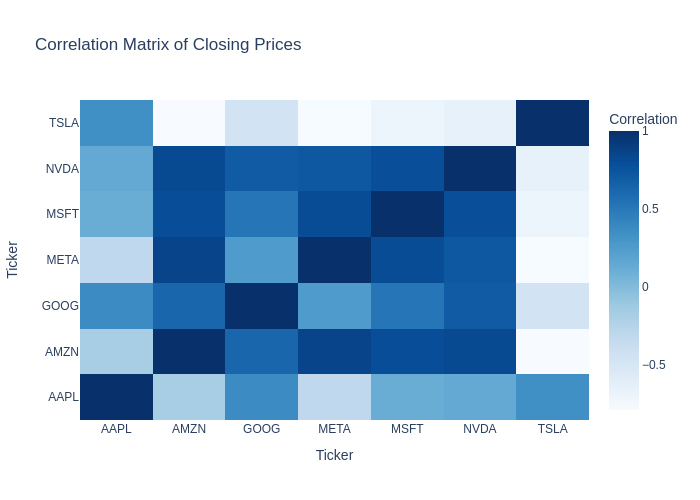

In [9]:
# Correlation
correlation_matrix = pivot_data.corr()

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='blues',
    colorbar=dict(title='Correlation')
))

# Update layout
fig.update_layout(
    title='Correlation Matrix of Closing Prices',
    xaxis_title='Ticker',
    yaxis_title='Ticker'
)

# Show the figure
fig.show()

From the heatmap, we can see that there are varrying degrees of positive correlations between the stocks, with some stocks showing showing strong correlation with each other. For instance, Nvidia shows a positive correlation to other stocks. The reason may be that, most of the magnificent seven stocks use the chips that Nvidia makes or it may be due to market sentiments or investor behaviour.

<a id="four"></a>
## 8. Comparative Analysis
<a class="anchor" id="1.1"></a>

In this section, we’ll compare the performance of different stocks based on their returns over the period (1 January 2024 - 14 June 2024). We’ll calculate the percentage change in closing prices from the start to the end of the period for each stock

<a href=#cont>Back to Table of Contents</a>

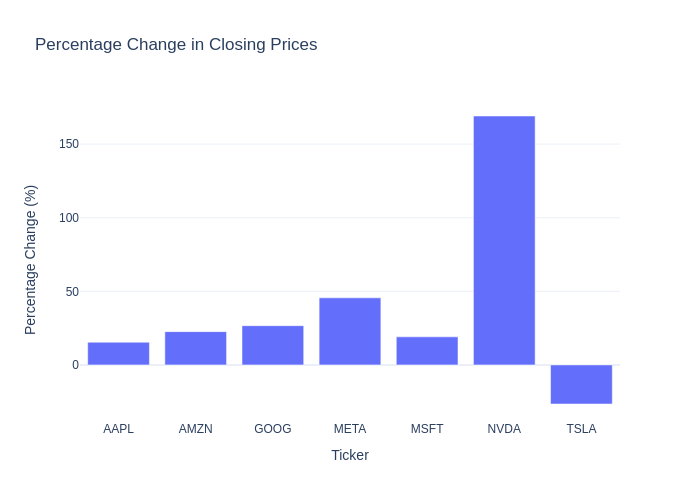

In [10]:
# Calculating the percentage change in closing prices
percentage_change = ((pivot_data.iloc[-1] - pivot_data.iloc[0]) / pivot_data.iloc[0]) * 100

fig = px.bar(
    percentage_change,
    x=percentage_change.index,
    y=percentage_change.values,
    labels={'x': 'Ticker', 'y': 'Percentage Change (%)'},
    title='Percentage Change in Closing Prices'
)

# Show the figure
fig.show()

The figure above and the accompanying data shows the percentage change in the closing prices of the stocks from the start to the end of the observed period:

*   **NVDA**: With the highest percentage change of about 169.08%.
*   **META**: With the second highest positive change of about 45.57%
*   **GOOG & AMZN**: Alphabet and Amazon also have a positive percentage change of 26.64% and 22.61%, respectively.
*   **AAPL & MSFT**: Apple and Microsoft also showed a positive double digit percentage change of 15.41% and 19.07%, respectively.
*   **TSLA**: The only stock in the so called magnificent seven which experienced a significant negative percentage change, at approximately -26.55%.

This shows that,except for Tesla, the magnificent seven has performed better than the broader stock market which is up 14% in the same period.

<a id="four"></a>
## 9. Daily Risk Vs. Return Analysis
<a class="anchor" id="1.1"></a>

To perform a Risk vs. Return Analysis, we will calculate the average daily return and the standard deviation of daily returns for each stock. The standard deviation will serve as a proxy for risk, while the average daily return represents the expected return. After that, we will plot these numbers to evaluate each stock's risk-return profile graphically. Although higher average returns and lower risk (measured by the standard deviation) in stocks make them typically more desirable, an investor's risk tolerance is often a determining factor in investment decisions.

<a href=#cont>Back to Table of Contents</a>

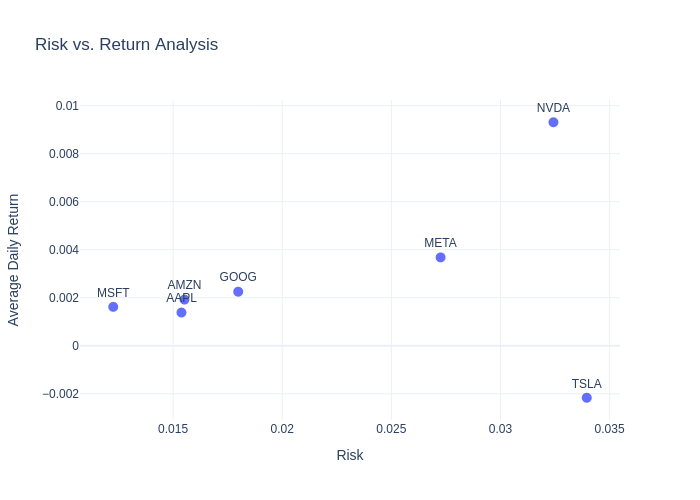

In [11]:
daily_return = pivot_data.pct_change().dropna()


# Calculating the average daily return and risk (standard deviation)
avg_daily_return = daily_return.mean()
risk = daily_return.std()

# Creating a dataframe for plotting
risk_return = pd.DataFrame({'Risk' : risk, 'Average Daily Return' : avg_daily_return})

fig = go.Figure()

# Add scatter plot points
fig.add_trace(go.Scatter(
    x=risk_return['Risk'],
    y=risk_return['Average Daily Return'],
    mode='markers+text',
    text=risk_return.index,
    textposition='top center',
    marker=dict(size=10)
))

# Update layout
fig.update_layout(
    title='Risk vs. Return Analysis',
    xaxis_title='Risk',
    yaxis_title='Average Daily Return',
    showlegend=False
)

# Show the figure
fig.show()

So, Microsoft (MSFT) shows the lowest risk with a positive average daily return, suggesting a more stable investment with consistent returns. Apple (AAPL) and Amazon (AMZN) have approxiamtely the same volatility, but Amazon has a slightly better average daily return. But both the stocks shows consistent returns and they are stable investments. Alphabet (GOOG) shows moderate risk on average when compared to AAPL, AMZN and MSFT, but with a slightly higher daily average return, suggesting a potentially more rewarding investment. As the saying goes "more risk, more reward", this is what can be said about META and Nvidia. Both of these stocks exhibits high risk and high positive daily return, although Nvidia shows higher risk and high return when compared to META. High risk doesn't equate to high returns, this was clearly showed by Tesla. Tesla exhibits the highest risk and a negative average daily return, indicating that it was the most volatile and least rewarding investment amongst the magnificent seven stocks over the analyzed period.

<a id="four"></a>
## 10. Conclusion
<a class="anchor" id="1.1"></a>



<a href=#cont>Back to Table of Contents</a>

In this project, we conducted a thorough quantitative analysis of the "Magnificent Seven" stocks: Alphabet (GOOG), Amazon (AMZN), Apple (AAPL), Meta Platforms (META), Microsoft (MSFT), Nvidia (NVDA), and Tesla (TSLA). These companies were chosen due to their significant market influence and dominance in their respective sectors, making them prime candidates for an in-depth financial analysis.

**Key Findings**:
1. **Descriptive Statistics**:

  * **Highest Mean Closing Price**: Meta Platforms (META) led with the highest mean closing price, highlighting its strong market performance.
  * **Volatility**: Nvidia (NVDA) showed substantial price variability, reflecting its dynamic market conditions, while Tesla (TSLA) exhibited the highest overall volatility.

2. **Time Series Analysis**:

  * **Trends**: Most stocks demonstrated upward trends in their closing prices, with Microsoft (MSFT) and Meta (META) trading at higher price points. Tesla, however, showed a decreasing trend due to concerns about electric vehicle demand.

3. **Volatility Analysis**:

  * **High Volatility**: Meta was the most volatile, indicating significant price fluctuations over the observed period.
  * **Low Volatility**: Microsoft and Apple exhibited more stable prices, suggesting lower investment risk compared to other stocks.

4. **Correlation Analysis**:

  * **Positive Correlation**: The stocks showed varying degrees of positive correlation, with Nvidia notably correlating well with others, likely due to its essential role in supplying chips used across the tech sector.

5. **Comparative Performance**:

  * **Highest Growth**: Nvidia demonstrated the highest percentage increase in closing prices (169.08%), followed by Meta (45.57%).
  * **Decline**: Tesla was the only stock with a significant negative percentage change (-26.55%), highlighting its challenges during the period.

6. **Daily Risk vs. Return Analysis**:

  * **Stable Investments**: Microsoft, Amazon and Apple were identified as stable investments with consistent returns and low risk.
  * **High Risk-High Reward**: Meta and Nvidia offered high returns but also carried higher risk, aligning with the principle that greater potential rewards come with higher risks.
  * **Underperformance**: Tesla, despite its high risk, yielded a negative average daily return, indicating it was the least rewarding investment among the group.

  The quantitative analysis underscores the unique risk-return profiles of each of the Magnificent Seven stocks. Investors must consider their risk tolerance and investment goals when choosing among these stocks. While Nvidia and Meta offer high returns at higher risks, Microsoft, Amazon and Apple provide more stable investment opportunities. Tesla, despite its innovative appeal, poses significant risks with less favorable returns. This analysis serves as a valuable tool for informed investment decisions in the tech sector.